# Problem Statement 1: 

Build a text classification RNN ( RecurrentNeural Network) model using IMDB dataset.Import theIMDBdataset using tensorflow_datasets and perform the following tasks.Tasks to be performed:•Import the required libraries•Shufflethe data for training and create batches of text and label pairs•Encode the text dataNote: The simplest way to process text for training is using the TextVectorization layer.•Build a sequential model using tf.keras.Sequential function•Compile the model•Train the model using train dataset•Test the data using tset datasetand evaluate the model by passing a sentenceNote:If the prediction is >= 0.0, it is positive else it is negative.Example: Output:•Import the required libraries•Shufflethe data for training and create batches of text and label pairs•Encode the text dataNote: The simplest way to process text for training is using the TextVectorization layer.Create the layer, and pass the dataset's text to the layer's .adapt method.•Build a sequential model using tf.keras.Sequential function•Compile the model•Train the model using train dataset•Test the data using tset datasetand evaluate the model by passing a sentenceNote:If the prediction is >= 0.0, it is positive else it is negative.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# Load the IMDB dataset
imdb = tf.keras.datasets.imdb

# Load the data with the argument `num_words` to limit the vocabulary size and `maxlen` to set the maximum sequence length
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, maxlen=250)

# Convert the data to numpy arrays and pad sequences
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=250)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=250)

# Encode the text data using TextVectorization
max_vocab_size = 10000
max_sequence_length = 250

vectorize_layer = TextVectorization(
    max_tokens=max_vocab_size,
    output_mode='int',
    output_sequence_length=max_sequence_length
)

# Function to convert integer sequences to strings
def int_seq_to_str(seq):
    return ' '.join(map(str, seq))

# Create a list of strings from the integer sequences
train_data_str = [int_seq_to_str(seq) for seq in train_data]

# Adapt the TextVectorization layer using the list of strings
vectorize_layer.adapt(tf.constant(train_data_str, dtype=tf.string))

# Build the sequential model
model = Sequential([
    vectorize_layer,
    Embedding(input_dim=max_vocab_size, output_dim=64, mask_zero=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
import tensorflow as tf
import numpy as np

# Convert the list of strings to numpy arrays
train_data_str = np.array(train_data_str)
train_labels = np.array(train_labels)
test_data_str = np.array([int_seq_to_str(seq) for seq in test_data])

# Adapt the TextVectorization layer using the test data
vectorize_layer.adapt(tf.constant(test_data_str, dtype=tf.string))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data_str, test_labels)
print(f"Test Accuracy: {test_accuracy}")

# Evaluate the model by passing a sentence
sample_sentence = ["The movie was great!"]
sample_sentence_str = int_seq_to_str(vectorize_layer(sample_sentence))[0]

# Adjust the shape of the input tensor
sample_sentence = tf.constant([sample_sentence_str])
sample_sentence = tf.reshape(sample_sentence, shape=(1,))

prediction = model.predict(sample_sentence)[0][0]

if prediction >= 0.5:
    print("Positive sentiment!")
else:
    print("Negative sentiment!")






550/550 [==============================] - 25s 37ms/step - loss: 0.6931 - accuracy: 0.5052
Test Accuracy: 0.5052308440208435
1/1 [==============================] - 2s 2s/step
Negative sentiment!


# Problem Statement 2 
Sumanth wants to build an flowers image classification CNN model which can take a flower image as input and prints the name of flower.Dataset Description:The dataset consistof 3,700 photos of flowers. The dataset contains five sub-directories, one per class:•daisy•dandelion•roses•sunflowers•tulipsTasks to be performed:•Import all the required libraries•Download the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization•Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio•Plot a sample image attributed to each class name present in the original dataset.•Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number•Build a sequential CNN model•Compile the modeland print model summary•Train and validate the model and plot the validation results using a line plot•Feed the system with an image of a flower and print the prediction along with the accuracyExample: Output:•Import all the required libraries•Download the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization
Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio•Build a sequential CNN model •Compilethe modeland print model summary•Feed the system with an image of a flower and print the prediction along with the accuracy

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                   

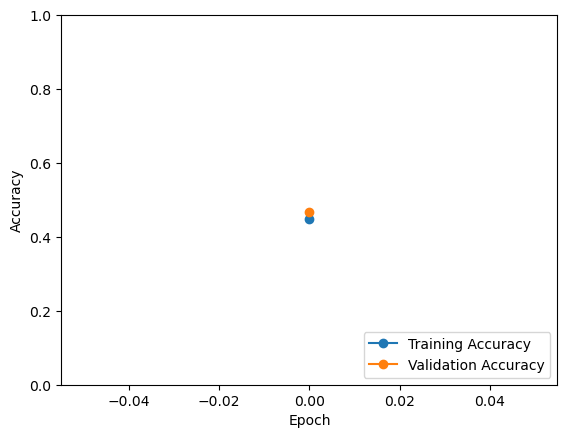

92/92 [==============================] - 59s 623ms/step - loss: 1.3490 - accuracy: 0.4474 - val_loss: 1.1608 - val_accuracy: 0.4679


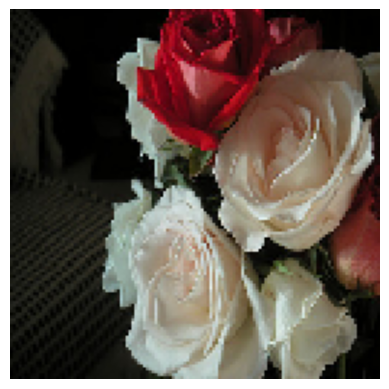

1/1 [==============================] - 0s 115ms/step
This image most likely belongs to daisy with 42.65% confidence.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Prepare the data and split into training and validation datasets
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 32
image_resolution = (128, 128)

# Load the entire dataset
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

data_dir = r'C:\Users\King\Desktop\DSML Internship\Assignments\Assignment 7\flower_photos'

# Split the data into training and validation sets
train_data_gen = data_gen.flow_from_directory(
    data_dir,
    target_size=image_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_data_gen = data_gen.flow_from_directory(
    data_dir,
    target_size=image_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)


# Build a sequential CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model and print model summary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Custom callback to capture training and validation accuracy during training
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}/{self.params['epochs']} - "
              f"Accuracy: {logs['accuracy']:.4f} - "
              f"Validation Accuracy: {logs['val_accuracy']:.4f}")

        # Plotting the accuracy dynamically
        plt.plot(logs['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
        plt.plot(logs['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0, 1])
        plt.legend(loc='lower right')
        plt.show()

# Train the model with the custom accuracy callback
model.fit(
    train_data_gen,
    epochs=1,
    validation_data=val_data_gen,
    callbacks=[AccuracyCallback()]
)

# Feed the system with an image of a flower and print the prediction along with the accuracy
flower_image_path = r'C:\Users\King\Desktop\DSML Internship\Assignments\Assignment 7\flower_photos\roses\rose flower.jpg'

# Load the flower image
flower_image = tf.keras.preprocessing.image.load_img(
    flower_image_path, target_size=image_resolution
)

# Display the loaded image
plt.imshow(flower_image)
plt.axis('off')
plt.show()

# Convert the image to a numpy array and normalize it
flower_image_array = tf.keras.preprocessing.image.img_to_array(flower_image)
flower_image_array = tf.expand_dims(flower_image_array, 0) / 255.0

# Make predictions
predictions = model.predict(flower_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class = train_data_gen.class_indices
confidence = predictions[0][predicted_class_index]

# Get the class label from the class indices dictionary
class_labels = list(train_data_gen.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the prediction result
print(f"This image most likely belongs to {predicted_class_name} with {confidence * 100:.2f}% confidence.")
